In [1]:
! pip3 install neo4j
! pip3 install matplotlib
! pip3 install numpy

In [2]:
from neo4j import GraphDatabase
from insert_data import insert_data
from delete_data import delete_data
from update_data import update_data
import batch_insert
import batch_update
import traversers
from read_data import read_data
import matplotlib.pyplot as plt
import numpy as np

uri = "bolt://localhost:7687"
username = "neo4j"

def get_vertices_number(args, option=True):

    if option:
        assert "node_1" in args.graph_name

        if args.graph_name == "node_10":
            vertices = 10
        elif args.graph_name == "node_100":
            vertices = 100
        elif args.graph_name == "node_1000":
            vertices = 1000
        elif args.graph_name == "node_10000":
            vertices = 10000
        elif args.graph_name == "node_100000":
            vertices = 100000
        elif args.graph_name == "node_1000000":
            vertices = 1000000
        else:
            assert False
    else:
        assert "node_1" in args

        if args == "node_10":
            vertices = 10
        elif args == "node_100":
            vertices = 100
        elif args == "node_1000":
            vertices = 1000
        elif args == "node_10000":
            vertices = 10000
        elif args == "node_100000":
            vertices = 100000
        elif args == "node_1000000":
            vertices = 1000000
        else:
            assert False
    
    return vertices

def mapping(l, key_1, key_2):
    return list(map(lambda x: x[key_1][key_2], l))


databases = ['node_10', 'node_100', 'node_1000', 'node_10000', 'node_100000', 'node_1000000']

In [3]:

import os
my_path = os.path.abspath(".")
print(my_path)

c:\Users\Admin\Desktop\9th_sem\last_lambda\CompareGraphDatabases\neo4j


In [4]:
def plot(title, x_labels, X_axis, time, option="vertices", database="node_10"):
    plt.figure(figsize=(10,10))
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis - 0.4, mapping(time, option, "min"), 0.4, label="min")
    plt.bar(X_axis, mapping(time, option, "mean"), 0.4, label="mean")
    plt.bar(X_axis + 0.4, mapping(time, option, "max"), 0.4, label="max")
    
    plt.savefig(my_path + "/plots/" + database + "/" + title + ".png")
    plt.legend()


In [5]:
def execute_database(database, large=True):
    password = database + database
    driver = GraphDatabase.driver(uri, auth=(username, password))
    
    vertices = get_vertices_number(database, False)

    file = open(database + ".txt", 'r')
    lines = file.readlines()[2:]
    time = []

    if not large:
        time.append(insert_data.insert_all_data(lines=lines, driver=driver))
        time.append(update_data.update_all_data(n=vertices, driver=driver))
        time.append(batch_update.batch_update(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
        time.append(read_data.read_all_data(n=vertices, driver=driver))
        time.append(delete_data.delete_k_vertices_and_edges(k=vertices, driver=driver))
        time.append(batch_insert.batch_insert(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
            
        x_labels = ["insert", "update", "batch_upd", "read", "delete", "batch_insert"]
    else:
        time.append(batch_insert.batch_insert(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
        time.append(batch_update.batch_update(number_of_vertices=vertices, batch_size_vertices=1000, lines=lines, batch_size_edges=1000, driver=driver))
        time.append(read_data.read_all_data(n=100, driver=driver))
        time.append(delete_data.delete_k_vertices_and_edges(k=100, driver=driver))
        x_labels = ["batch_insert", "batch_update", "read", "delete"]

    X_axis = np.arange(len(x_labels))*2

    plot("Basic sequence on " + database + ": Vertices", x_labels, X_axis, time, "vertices", database)
    plot("Basic sequence on " + database + ": Edges", x_labels, X_axis, time, "edges", database)

    if not large:
        x_labels = ["insert", "batch insert"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[0], time[5]]
        plot("Insert times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Insert times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["update", "batch_upd"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[1], time[2]]
        plot("Update times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Update times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)
    
    plt.show()
    if not large:
        return {
            "insert": time[0],
            "update": time[1],
            "batch_update": time[2],
            "read": time[3],
            "delete": time[4],
            "batch_insert": time[5],
        }
    else:
        return {
            "batch insert": time[0],
            "batch update": time[1],
            "read": time[2],
            "delete": time[3],
        }

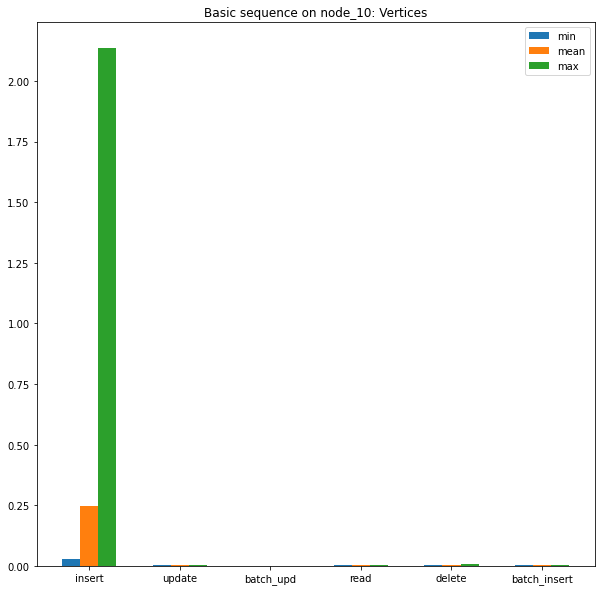

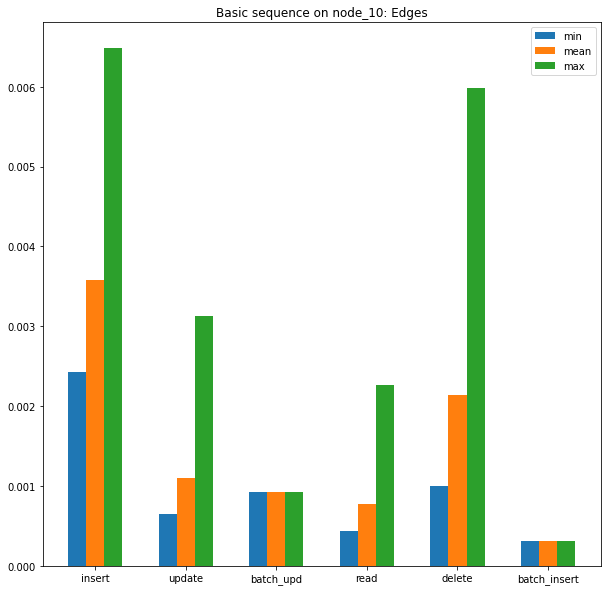

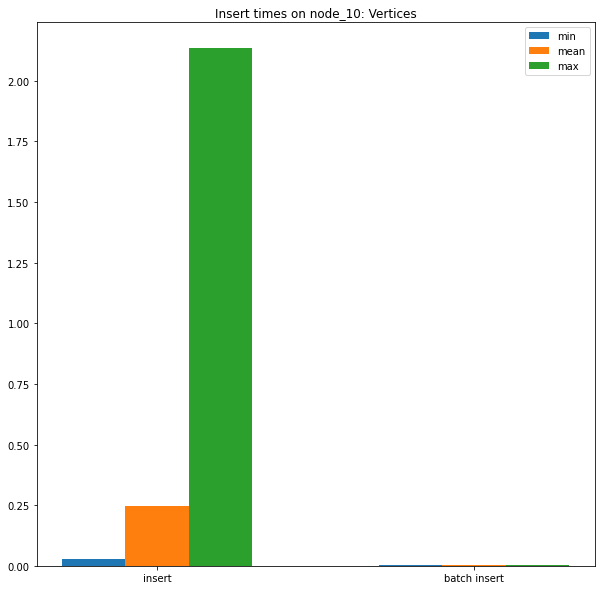

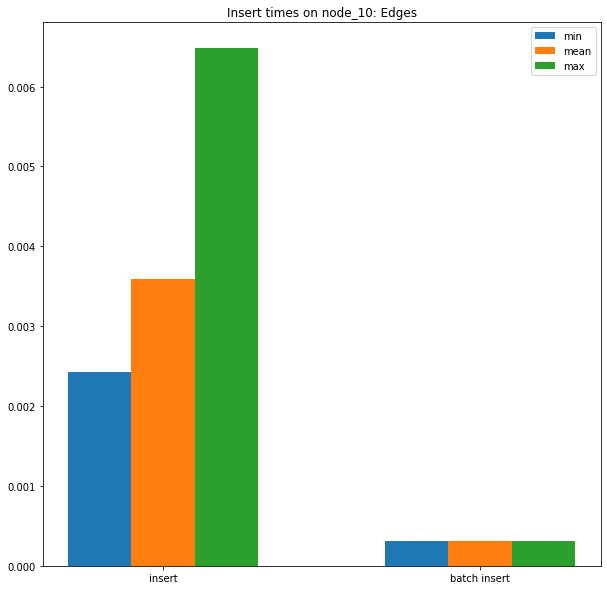

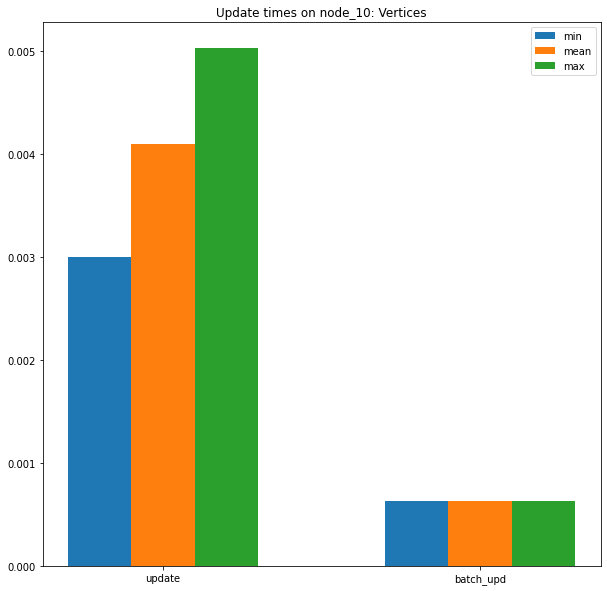

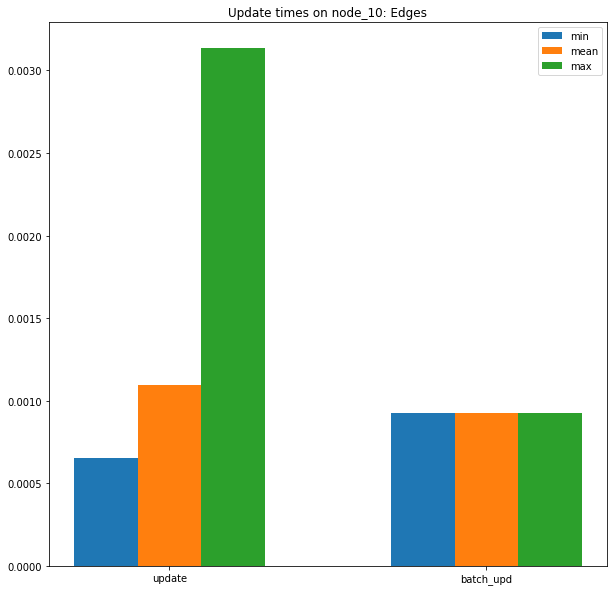

db: node_10
{'insert': {'edges': {'min': 0.002424955368041992, 'max': 0.006482124328613281, 'mean': 0.0035849767071860178, 'total_time': 0.200758695602417}, 'vertices': {'min': 0.028930187225341797, 'max': 2.1348836421966553, 'mean': 0.247001051902771, 'total_time': 2.47001051902771}}, 'update': {'edges': {'min': 0.0006520066942487444, 'max': 0.003134863717215402, 'mean': 0.0010957558949788412, 'total_time': 0.06574535369873047}, 'vertices': {'min': 0.002994537353515625, 'max': 0.005026817321777344, 'mean': 0.0040923357009887695, 'total_time': 0.040923357009887695}}, 'batch_update': {'vertices': {'min': 0.0006294965744018555, 'max': 0.0006294965744018555, 'mean': 0.0006294965744018555, 'total_time': 0.006294965744018555}, 'edges': {'min': 0.0009273886680603027, 'max': 0.0009273886680603027, 'mean': 0.0009273886680603027, 'total_time': 0.055643320083618164}}, 'read': {'edges': {'min': 0.0004315376281738281, 'max': 0.0022677694048200336, 'mean': 0.0007807532946268718, 'total_time': 0.046

In [6]:
results = {}
results["node_10"] = execute_database("node_10", False)
print("db:", "node_10")
print(results["node_10"])

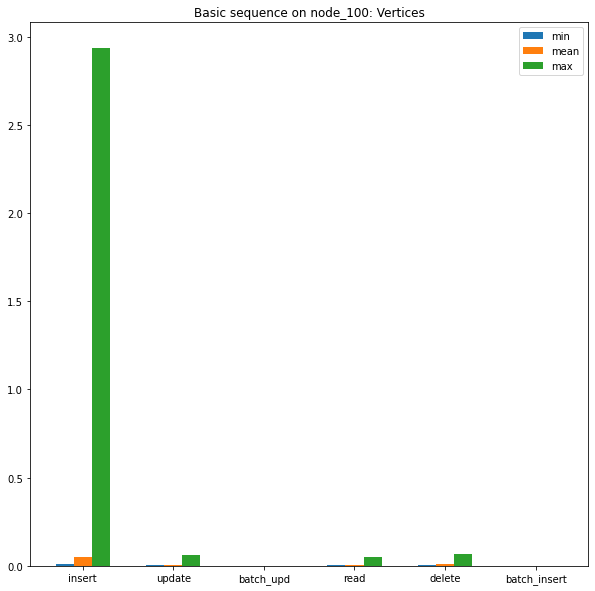

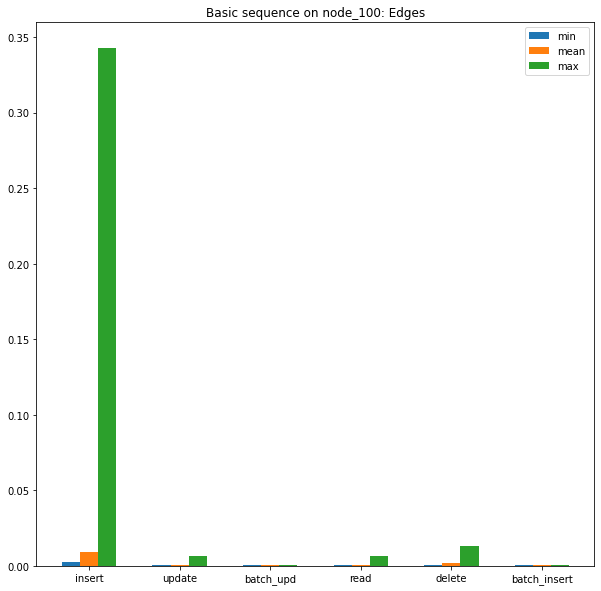

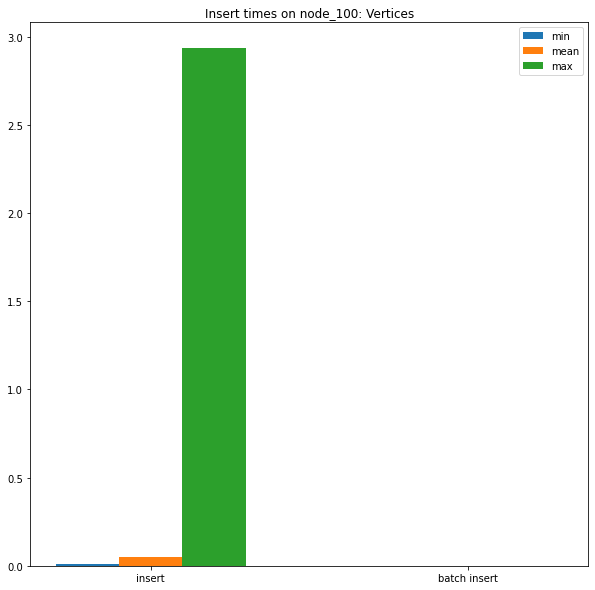

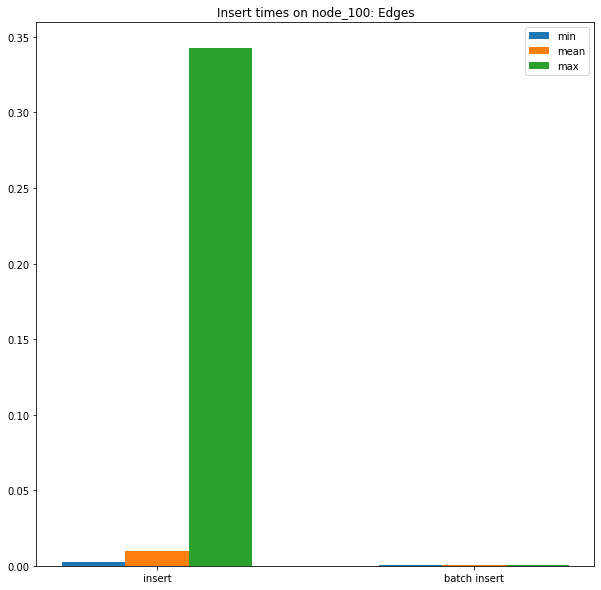

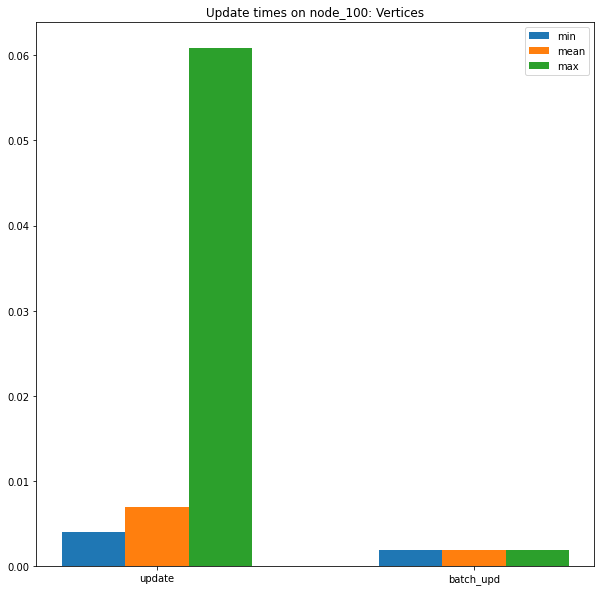

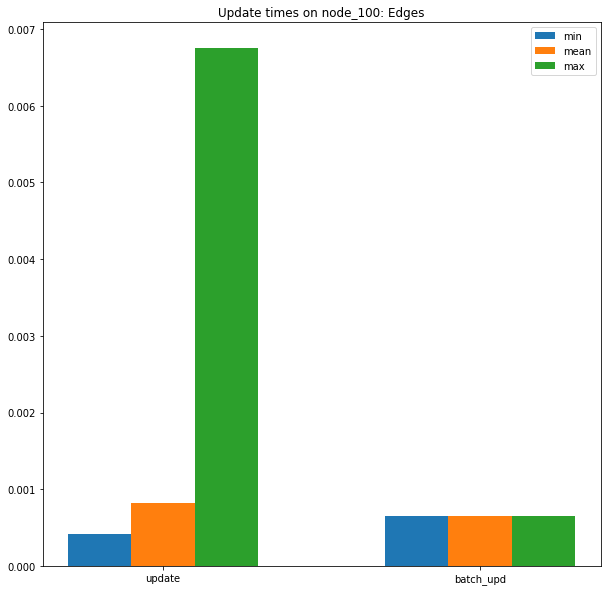

db: node_100
{'insert': {'edges': {'min': 0.002493739128112793, 'max': 0.342584490776062, 'mean': 0.00949050909699405, 'total_time': 11.350648880004883}, 'vertices': {'min': 0.007978439331054688, 'max': 2.934978485107422, 'mean': 0.05158019781112671, 'total_time': 5.158019781112671}}, 'update': {'edges': {'min': 0.00041066899019129137, 'max': 0.006750858747042143, 'mean': 0.0008136079708735148, 'total_time': 0.9763295650482178}, 'vertices': {'min': 0.00397038459777832, 'max': 0.060843706130981445, 'mean': 0.006965060234069825, 'total_time': 0.6965060234069824}}, 'batch_update': {'vertices': {'min': 0.0018549609184265138, 'max': 0.0018549609184265138, 'mean': 0.0018549609184265138, 'total_time': 0.18549609184265137}, 'edges': {'min': 0.0006565670172373454, 'max': 0.0006565670172373454, 'mean': 0.0006565670172373454, 'total_time': 0.7878804206848145}}, 'read': {'edges': {'min': 0.0003799256824311756, 'max': 0.006751243884746845, 'mean': 0.0007396392027537028, 'total_time': 0.887567043304

In [7]:
results["node_100"] = execute_database("node_100", False)
print("db:", "node_100")
print(results["node_100"])

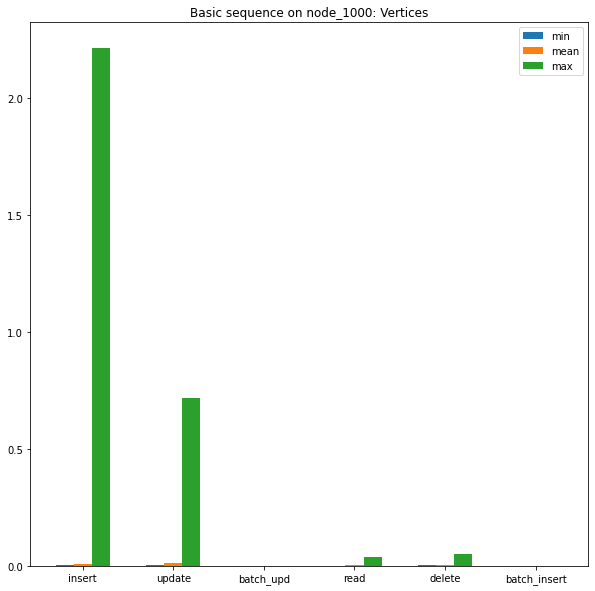

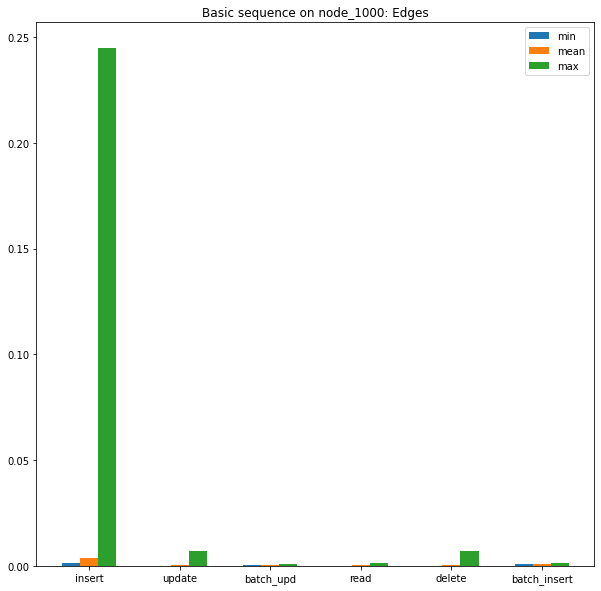

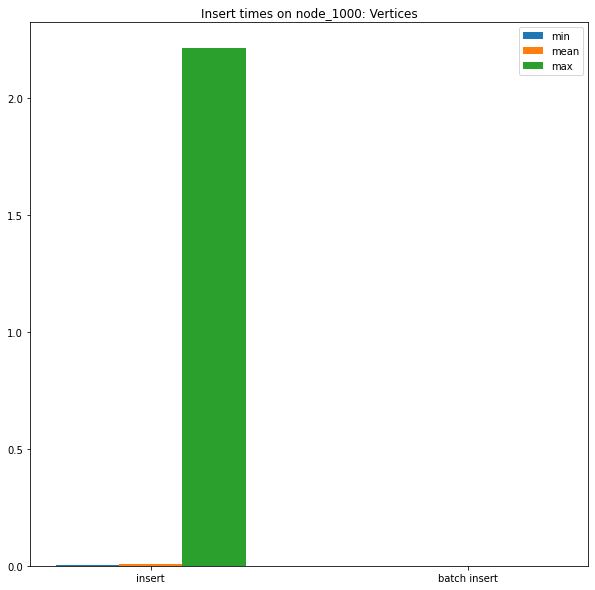

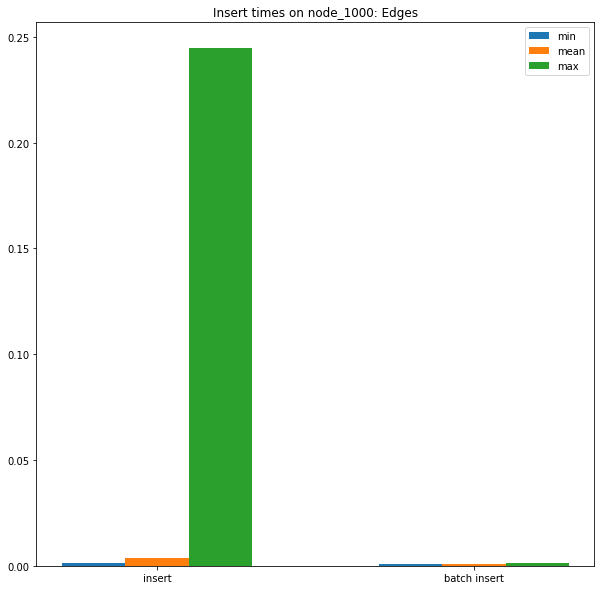

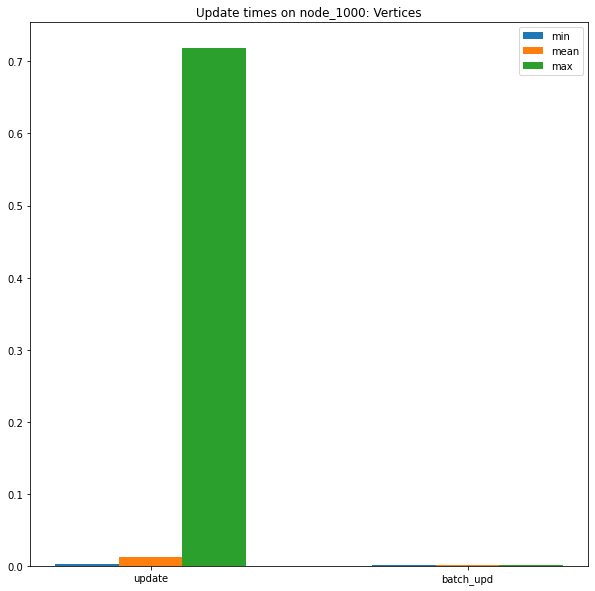

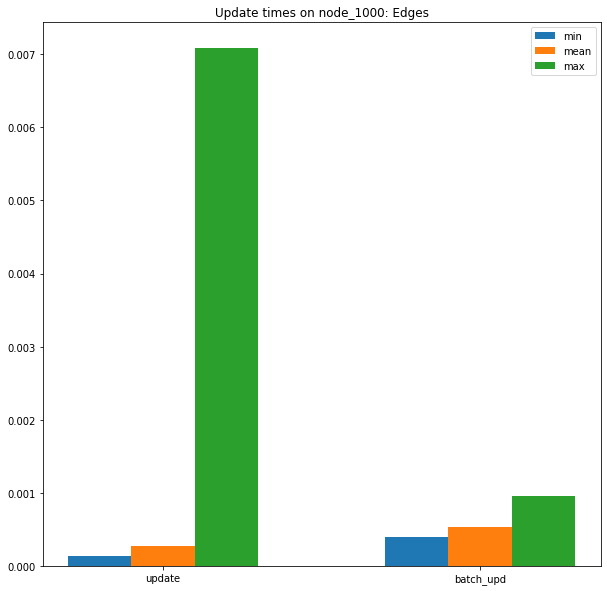

db: node_1000
{'insert': {'edges': {'min': 0.0014960765838623047, 'max': 0.2447052001953125, 'mean': 0.0035419528352501027, 'total_time': 422.09451937675476}, 'vertices': {'min': 0.0019936561584472656, 'max': 2.2150609493255615, 'mean': 0.0077169934710065325, 'total_time': 7.724710464477539}}, 'update': {'edges': {'min': 0.0001326821294669404, 'max': 0.007082473400027253, 'mean': 0.000274259021240595, 'total_time': 32.677688121795654}, 'vertices': {'min': 0.0019948482513427734, 'max': 0.7183244228363037, 'mean': 0.011814310789108277, 'total_time': 11.814310789108276}}, 'batch_update': {'vertices': {'min': 0.0011474485397338866, 'max': 0.0011474485397338866, 'mean': 0.0011474485397338866, 'total_time': 1.1474485397338867}, 'edges': {'min': 0.00039647340774536134, 'max': 0.000960364818572998, 'mean': 0.0005335577552132558, 'total_time': 63.586211919784546}}, 'read': {'edges': {'min': 0.00013503028836312774, 'max': 0.0012756498236405221, 'mean': 0.0001931945352490529, 'total_time': 23.018

In [9]:
results["node_1000"] = execute_database("node_1000", False)
print("db:", "node_1000")
print(results["node_1000"])

In [12]:
results["node_10000"] = execute_database("node_10000", large=True)
print("db:", "node_10000")
print(results["node_10000"])

Failed to write data to connection IPv4Address(('localhost', 7687)) (IPv4Address(('127.0.0.1', 7687)))


BufferError: Existing exports of data: object cannot be re-sized

In [ ]:
results["node_100000"] = execute_database("node_100000", large=True)
print("db:", "node_100000")
print(results["node_100000"])

In [ ]:
results["node_1000000"] = execute_database("node_1000000", large=True)
print("db:", "node_1000000")
print(results["node_1000000"])